In [974]:
import os
os.chdir("C:\\Users\\Poori\\Desktop\\Delloite\\AirBnB10K")

In [975]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
houses_train=pd.read_csv("train10k.csv")
houses_test=pd.read_csv("test2k.csv")

In [976]:
houses_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,False,...,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,NaN,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,NaN,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,True,...,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,NaN,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,False,...,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,NaN,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,True,...,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.0,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0


In [977]:
houses_test.columns
#houses_test[]

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [978]:
houses_train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [979]:
houses_test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [980]:
houses_train["property_type"].unique()

array(['Apartment', 'House', 'Timeshare', 'Villa', 'Condominium',
       'Townhouse', 'Loft', 'Serviced apartment', 'Bungalow',
       'Boutique hotel', 'Guest suite', 'Other', 'Guesthouse',
       'Bed & Breakfast', 'Camper/RV', 'Castle', 'Cabin', 'Hostel',
       'Boat', 'Tipi', 'Dorm', 'Tent', 'Chalet', 'In-law', 'Cave',
       'Earth House', 'Vacation home', 'Treehouse'], dtype=object)

In [981]:
houses_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.000000e+04,10000.000000,10000.00000,9974.000000,10000.000000,10000.000000,10000.000000,7714.000000,9986.000000,9977.000000
mean,1.121862e+07,4.790830,3.14660,1.240525,38.426223,-92.481286,20.532900,94.106041,1.261065,1.705823
std,6.086583e+06,0.719634,2.15573,0.590796,3.078567,21.710604,36.447603,7.929820,0.846945,1.215609
min,3.362000e+03,1.609438,1.00000,0.000000,33.343287,-122.510941,0.000000,20.000000,0.000000,1.000000
25%,6.185343e+06,4.317488,2.00000,1.000000,34.127979,-118.343094,1.000000,92.000000,1.000000,1.000000
50%,1.220670e+07,4.744932,2.00000,1.000000,40.659715,-77.001433,6.000000,96.000000,1.000000,1.000000
75%,1.635534e+07,5.220356,4.00000,1.000000,40.745598,-73.954729,23.000000,100.000000,1.000000,2.000000
max,2.120388e+07,7.569412,16.00000,8.000000,42.390437,-70.985047,530.000000,100.000000,8.000000,16.000000


In [982]:
houses_train["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [983]:
len(list(houses_train["amenities"].unique()))

9673

In [984]:
#houses=pd.concat([houses_train,houses_test],keys=['train','test'])
#houses.head()

In [985]:
#houses_test.head()
from sklearn.preprocessing import OneHotEncoder 
houses_train['amenities'].head()

0    {"Wireless Internet","Wheelchair accessible",K...
1    {TV,"Cable TV",Internet,"Wireless Internet","A...
2    {"Wireless Internet",Kitchen,"Free parking on ...
3    {"Cable TV",Internet,"Wireless Internet","Air ...
4    {TV,Pool,Kitchen,Gym,Elevator,Heating,"Family/...
Name: amenities, dtype: object

In [986]:
houses_train['amenities']=houses_train['amenities'].str.replace("{","")
houses_train['amenities']=houses_train['amenities'].str.replace("}","")
houses_train['amenities']

0       "Wireless Internet","Wheelchair accessible",Ki...
1       TV,"Cable TV",Internet,"Wireless Internet","Ai...
2       "Wireless Internet",Kitchen,"Free parking on p...
3       "Cable TV",Internet,"Wireless Internet","Air c...
4       TV,Pool,Kitchen,Gym,Elevator,Heating,"Family/k...
                              ...                        
9995    TV,"Cable TV",Internet,"Wireless Internet",Kit...
9996    "Wireless Internet","Air conditioning",Kitchen...
9997    "Wireless Internet","Air conditioning",Kitchen...
9998    "Wireless Internet","Air conditioning",Kitchen...
9999    TV,Internet,"Wireless Internet","Air condition...
Name: amenities, Length: 10000, dtype: object

In [987]:
count=0
lst=[]
for i in houses_train['amenities']:
    st=i.split(',')
    lst.extend(st)
    lst=set(lst)
    lst=list(lst)
    count+=1
    #if count==3:
    #    break

#print(lst)
#print(i)
j=houses_train['amenities'][0]
#print(j.split(','))
l=j.split(',')
k=list(i.split(','))
#i.split(',').replace("{","").replace("}","")

len(lst)
lst.pop(0)
lst

['Bathtub',
 'Breakfast',
 'Dryer',
 '"Wireless Internet"',
 '"Private bathroom"',
 'Smartlock',
 '"Babysitter recommendations"',
 'Hangers',
 '"BBQ grill"',
 '"Safety card"',
 '"Hot tub"',
 '"Pets allowed"',
 '"Path to entrance lit at night"',
 '"Handheld shower head"',
 '"Buzzer/wireless intercom"',
 '"Firm mattress"',
 'Doorman',
 '"Changing table"',
 '"Baby bath"',
 '"Cooking basics"',
 '"Paid parking off premises"',
 'Shampoo',
 '"translation missing: en.hosting_amenity_49"',
 '"Suitable for events"',
 '"Hot water kettle"',
 '"Patio or balcony"',
 '"Extra pillows and blankets"',
 '"Window guards"',
 '"Ethernet connection"',
 '"Air conditioning"',
 '"Other pet(s)"',
 'Essentials',
 '"Coffee maker"',
 '"Lock on bedroom door"',
 '"Wheelchair accessible"',
 '"translation missing: en.hosting_amenity_50"',
 '"First aid kit"',
 '"Wide clearance to shower & toilet"',
 '"Cleaning before checkout"',
 '"Step-free access"',
 'Waterfront',
 'Crib',
 'Cat(s)',
 '"Smart lock"',
 'Dog(s)',
 '"Poc

In [988]:
houses_train_copy=houses_train.copy()
for i in lst:
    houses_train_copy[i]=0
#houses_train_copy['"Changing table"']
st=[]
row=0
for i in houses_train_copy['amenities']:
    st=i.split(',')
    for i in st:
        houses_train_copy.loc[row,i]=1
        #houses_train_copy[i][row]=1
    row+=1
houses_train_copy['"Changing table"']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: "Changing table", Length: 10000, dtype: int64

In [989]:
houses_train_copy=houses_train_copy.iloc[:,0:151]
print(houses_train_copy.iloc[:,150].value_counts())
print(houses_train_copy.iloc[:,150].head())

0    9445
1     555
Name: Stove, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Stove, dtype: int64


In [990]:
houses_train_copy[houses_train_copy['"Changing table"']==1]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,TV,Gym,"""Air purifier""","""Baby monitor""","""Bed linens""",Keypad,Oven,"""Single level home""","""Lake access""",Stove
183,3432296,6.212606,Apartment,Entire home/apt,"TV,Internet,""Wireless Internet"",Kitchen,""Buzze...",8,3.0,Real Bed,strict,True,...,1,0,0,1,1,1,1,0,0,1
355,19823304,5.918894,Apartment,Entire home/apt,"TV,Internet,""Wireless Internet"",""Air condition...",6,2.0,Real Bed,strict,False,...,1,0,0,0,0,0,0,0,0,0
489,14202480,4.867534,Apartment,Entire home/apt,"""Wireless Internet"",""Air conditioning"",Kitchen...",4,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,1,0,0,1
884,13164444,5.293305,House,Entire home/apt,"TV,""Wireless Internet"",""Air conditioning"",Pool...",8,2.5,Real Bed,strict,True,...,1,0,0,0,1,1,1,0,0,1
961,6613140,4.700480,Apartment,Entire home/apt,"Internet,""Wireless Internet"",""Air conditioning...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0
1768,9505047,4.605170,Apartment,Entire home/apt,"TV,""Wireless Internet"",""Air conditioning"",Kitc...",8,1.0,Real Bed,moderate,True,...,1,0,0,0,0,1,0,0,0,0
1988,7842355,6.396930,House,Entire home/apt,"TV,""Cable TV"",""Wireless Internet"",Kitchen,""Fre...",6,1.5,Real Bed,moderate,True,...,1,0,0,0,1,0,1,0,0,1
2188,14278303,4.077537,House,Private room,"Internet,""Wireless Internet"",""Air conditioning...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2283,15549517,5.843544,Apartment,Entire home/apt,"TV,""Cable TV"",""Wireless Internet"",""Air conditi...",5,2.0,Real Bed,flexible,False,...,1,0,0,0,0,0,0,0,0,0
2414,3689473,5.910797,House,Entire home/apt,"TV,Internet,""Wireless Internet"",""Air condition...",11,2.0,Real Bed,strict,True,...,1,0,0,0,0,0,0,0,0,0


In [991]:
list(houses_train.columns)

['id',
 'log_price',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

In [993]:
#sorted(houses_train_copy.isnull().sum(),reverse=True)
houses_train_copy.iloc[:,0:10].isnull().sum()
# bathrooms, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, last_review
# neighbourhood, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds

id                      0
log_price               0
property_type           0
room_type               0
amenities               0
accommodates            0
bathrooms              26
bed_type                0
cancellation_policy     0
cleaning_fee            0
dtype: int64

In [994]:
houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].apply(np.floor)

In [995]:
houses_train_copy.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,TV,Gym,"""Air purifier""","""Baby monitor""","""Bed linens""",Keypad,Oven,"""Single level home""","""Lake access""",Stove
0,5506438,4.605170,Apartment,Entire home/apt,"""Wireless Internet"",""Wheelchair accessible"",Ki...",3,1.0,Real Bed,flexible,False,...,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,Apartment,Entire home/apt,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",2,1.0,Real Bed,flexible,True,...,1,0,0,0,0,0,0,0,0,0
2,9493786,4.077537,House,Private room,"""Wireless Internet"",Kitchen,""Free parking on p...",3,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,9961396,5.686975,Apartment,Entire home/apt,"""Cable TV"",Internet,""Wireless Internet"",""Air c...",1,1.0,Real Bed,flexible,False,...,0,0,0,0,0,0,0,0,0,0
4,4820071,5.991465,Apartment,Entire home/apt,"TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/k...",3,1.0,Real Bed,strict,True,...,1,1,0,0,0,0,0,0,0,0


In [996]:
#houses_train_copy['bathrooms']=pd.to_numeric(houses_train_copy['bathrooms'], downcast='integer')
#houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].astype(int)

In [997]:
houses_train_copy.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,TV,Gym,"""Air purifier""","""Baby monitor""","""Bed linens""",Keypad,Oven,"""Single level home""","""Lake access""",Stove
0,5506438,4.605170,Apartment,Entire home/apt,"""Wireless Internet"",""Wheelchair accessible"",Ki...",3,1.0,Real Bed,flexible,False,...,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,Apartment,Entire home/apt,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",2,1.0,Real Bed,flexible,True,...,1,0,0,0,0,0,0,0,0,0
2,9493786,4.077537,House,Private room,"""Wireless Internet"",Kitchen,""Free parking on p...",3,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,9961396,5.686975,Apartment,Entire home/apt,"""Cable TV"",Internet,""Wireless Internet"",""Air c...",1,1.0,Real Bed,flexible,False,...,0,0,0,0,0,0,0,0,0,0
4,4820071,5.991465,Apartment,Entire home/apt,"TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/k...",3,1.0,Real Bed,strict,True,...,1,1,0,0,0,0,0,0,0,0


In [998]:
# bathrooms, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, last_review
# neighbourhood, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds

#sorted(houses_train_copy.isnull().sum(),reverse=True)
houses_train_copy.iloc[:,0:41].isnull().sum()
#host_has_profile_pic        21
#host_identity_verified      21
#host_since                  21
#houses_train_copy[houses_train_copy["host_has_profile_pic"]==np.nan]
houses_train_copy[pd.isnull(houses_train_copy["host_has_profile_pic"])][{"host_has_profile_pic","host_identity_verified","host_since"}]

,host_since,host_identity_verified,host_has_profile_pic
95,NaN,NaN,NaN
241,NaN,NaN,NaN
886,NaN,NaN,NaN
1622,NaN,NaN,NaN
3191,NaN,NaN,NaN
4124,NaN,NaN,NaN
4589,NaN,NaN,NaN
4790,NaN,NaN,NaN
5043,NaN,NaN,NaN
5053,NaN,NaN,NaN


In [999]:
indx=houses_train_copy[pd.isnull(houses_train_copy["host_has_profile_pic"])].iloc()
#list(indx)
indx

In [1000]:
houses_train_copy.dropna(subset=['host_has_profile_pic'], inplace=True)
houses_train_copy.iloc[:,0:50].isnull().sum()

id                                    0
log_price                             0
property_type                         0
room_type                             0
amenities                             0
accommodates                          0
bathrooms                            26
bed_type                              0
cancellation_policy                   0
cleaning_fee                          0
city                                  0
description                           0
first_review                       2166
host_has_profile_pic                  0
host_identity_verified                0
host_response_rate                 2488
host_since                            0
instant_bookable                      0
last_review                        2164
latitude                              0
longitude                             0
name                                  0
neighbourhood                       939
number_of_reviews                     0
review_scores_rating               2280


In [1001]:
houses_train_copy["neighbourhood"].value_counts()

Williamsburg                          394
Bedford-Stuyvesant                    289
Bushwick                              222
Upper East Side                       196
Hell's Kitchen                        189
                                     ... 
Signal Hill                             1
Pico Rivera                             1
Beverly                                 1
Crotona                                 1
Central Northeast/Mahaning Heights      1
Name: neighbourhood, Length: 482, dtype: int64

In [1002]:
houses_train_copy["city"].value_counts()

NYC        4310
LA         3049
SF          866
DC          800
Chicago     498
Boston      456
Name: city, dtype: int64

In [1003]:
#name, thumbnail_url, first_review, last_review, host_response_rate, zipcode, thumbnail_url, review_scores_rating

In [1004]:
houses_train_copy.drop(["name","thumbnail_url","first_review","last_review","host_response_rate","zipcode","thumbnail_url","review_scores_rating"],axis=1,inplace=True)

In [1005]:
houses_train_copy.iloc[:,0:50].isnull().sum()

id                                                0
log_price                                         0
property_type                                     0
room_type                                         0
amenities                                         0
accommodates                                      0
bathrooms                                        26
bed_type                                          0
cancellation_policy                               0
cleaning_fee                                      0
city                                              0
description                                       0
host_has_profile_pic                              0
host_identity_verified                            0
host_since                                        0
instant_bookable                                  0
latitude                                          0
longitude                                         0
neighbourhood                                   939
number_of_re

In [1006]:
houses_train_copy.dropna(subset=['bathrooms','bedrooms','beds'], inplace=True)

#houses_train_copy_duplicate=houses_train_copy.copy()

houses_train_copy.iloc[:,0:50].isnull().sum()

id                                                0
log_price                                         0
property_type                                     0
room_type                                         0
amenities                                         0
accommodates                                      0
bathrooms                                         0
bed_type                                          0
cancellation_policy                               0
cleaning_fee                                      0
city                                              0
description                                       0
host_has_profile_pic                              0
host_identity_verified                            0
host_since                                        0
instant_bookable                                  0
latitude                                          0
longitude                                         0
neighbourhood                                   936
number_of_re

C:\Users\Poori\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


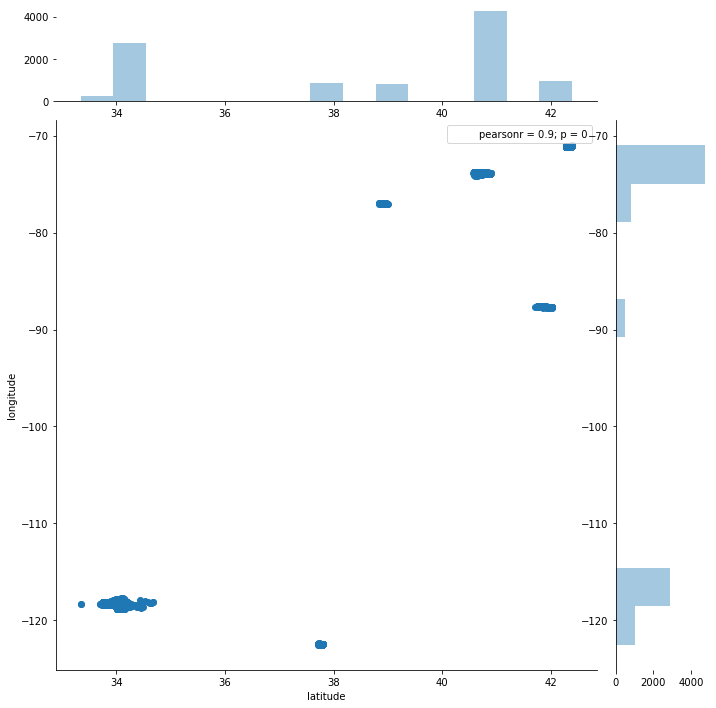

In [1007]:
import seaborn as sns
sns.jointplot(x=houses_train_copy.latitude,y=houses_train_copy.longitude,size=10)

In [1008]:
houses_train_copy.drop(["neighbourhood","description","amenities"],axis=1,inplace=True)

sum(houses_train_copy.isnull().sum()) #here neighbourhood is removed as we already have longitude and latitude information

0

In [1009]:
houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].astype(int)
houses_train_copy['bathrooms'].head()

0    1
1    1
2    1
3    1
4    1
Name: bathrooms, dtype: int32

In [1010]:
list(houses_train_copy.columns)

['id',
 'log_price',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'number_of_reviews',
 'bedrooms',
 'beds',
 'Bathtub',
 'Breakfast',
 'Dryer',
 '"Wireless Internet"',
 '"Private bathroom"',
 'Smartlock',
 '"Babysitter recommendations"',
 'Hangers',
 '"BBQ grill"',
 '"Safety card"',
 '"Hot tub"',
 '"Pets allowed"',
 '"Path to entrance lit at night"',
 '"Handheld shower head"',
 '"Buzzer/wireless intercom"',
 '"Firm mattress"',
 'Doorman',
 '"Changing table"',
 '"Baby bath"',
 '"Cooking basics"',
 '"Paid parking off premises"',
 'Shampoo',
 '"translation missing: en.hosting_amenity_49"',
 '"Suitable for events"',
 '"Hot water kettle"',
 '"Patio or balcony"',
 '"Extra pillows and blankets"',
 '"Window guards"',
 '"Ethernet connection"',
 '"Air conditioning"',
 '"Other pet(s)"',
 'Essentials',


In [1011]:
#from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder() 
#data['Gender']= le.fit_transform(data['Gender']) 
#data['Geography']= le.fit_transform(data['Geography'])
houses_train_copy.info

<bound method DataFrame.info of             id  log_price property_type        room_type  accommodates  \
0      5506438   4.605170     Apartment  Entire home/apt             3   
1     12343026   5.010635     Apartment  Entire home/apt             2   
2      9493786   4.077537         House     Private room             3   
3      9961396   5.686975     Apartment  Entire home/apt             1   
4      4820071   5.991465     Apartment  Entire home/apt             3   
...        ...        ...           ...              ...           ...   
9995   1399273   3.688879     Apartment     Private room             2   
9996  14249185   4.499810     Apartment     Private room             2   
9997  17098186   3.737670     Townhouse     Private room             2   
9998   9971487   4.174387         House     Private room             1   
9999  20017584   5.003946     Apartment     Private room             2   

      bathrooms  bed_type cancellation_policy  cleaning_fee    city  ... TV  \


In [1012]:
#houses_train_copy_duplicate=houses_train_copy.copy()
#houses_train_copy=houses_train_copy_duplicate.copy()

In [1013]:
from datetime import date
today=date.today()
print(today)

today=pd.to_datetime(today)

houses_train_copy["host_since"].dtype

houses_train_copy['host_since']=pd.to_datetime(houses_train_copy['host_since'])

(today-houses_train_copy["host_since"][0]).days
#houses_train_copy["host_since"].dtype

2020-03-31


3023

In [1014]:
houses_train_copy_duplicate1=houses_train_copy.copy()

houses_train_copy=houses_train_copy_duplicate1.copy()

houses_train_copy["host_since"]=today-houses_train_copy["host_since"]

In [1015]:
houses_train_copy["host_since"].head()
str(houses_train_copy["host_since"][0])

import re
int(re.findall('\d+',str(houses_train_copy["host_since"][0]))[0])


host_since_days=[int(re.findall('\d+',str(houses_train_copy["host_since"].iloc[i]))[0]) for i in range(len(houses_train_copy["host_since"]))]
print(len(host_since_days))
print(len(houses_train_copy["host_since"]))


houses_train_copy["host_since"]=host_since_days
houses_train_copy["host_since"].head()

9927
9927


0    3023
1    2290
2    1420
3    1659
4    1668
Name: host_since, dtype: int64

In [401]:
#int(str(houses_train_copy["host_since"][0])[0:4])

In [402]:
#[int(str(houses_train_copy["host_since"][i])[0:4]) for i in range(len(houses_train_copy["host_since"]))]

In [426]:
# property_type room_type bed_type cancellation_policy city number_of_reviews 

# cleaning_fee (1,0) host_identity_verified (1,0) instant_bookable (1,0) host_has_profile_pic (1,0)

# accommodates bathrooms bedrooms beds latitude longitude host_since

In [1025]:
houses_train_copy["cleaning_fee"].unique()
#houses_train_copy["cleaning_fee"][0]

array([0, 1], dtype=int64)

In [1018]:
houses_train_copy['cleaning_fee']=houses_train_copy['cleaning_fee'].apply(lambda x: 0 if x==False else 1)

In [1026]:
houses_train_copy["host_identity_verified"].unique()

array([1, 0], dtype=int64)

In [1020]:
houses_train_copy['host_identity_verified']=houses_train_copy['host_identity_verified'].apply(lambda x: 0 if x=="f" else 1)

In [1027]:
houses_train_copy["instant_bookable"].unique()

array([1, 0], dtype=int64)

In [1022]:
houses_train_copy['instant_bookable']=houses_train_copy['instant_bookable'].apply(lambda x: 0 if x=="f" else 1)

In [1028]:
houses_train_copy["host_has_profile_pic"].unique()

array([1, 0], dtype=int64)

In [1024]:
houses_train_copy['host_has_profile_pic']=houses_train_copy['host_has_profile_pic'].apply(lambda x: 0 if x=="f" else 1)

In [902]:
#houses_train_copy_duplicate2=houses_train_copy
#houses_tran_copy=houses_train_copy_duplicate2.copy()

In [1029]:
houses_train_copy.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       ...
       'TV', 'Gym', '"Air purifier"', '"Baby monitor"', '"Bed linens"',
       'Keypad', 'Oven', '"Single level home"', '"Lake access"', 'Stove'],
      dtype='object', length=141)

In [1030]:
# property_type room_type bed_type cancellation_policy city number_of_reviews 
houses_train_copy_dummies=pd.get_dummies(houses_train_copy, columns=['property_type', 'room_type','bed_type','cancellation_policy','city'])

In [1031]:
houses_train_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Columns: 183 entries, id to city_SF
dtypes: float64(5), int32(1), int64(130), uint8(47)
memory usage: 11.1 MB


In [1032]:
houses_train_copy_dummies['bathrooms']=houses_train_copy_dummies['bathrooms'].astype(int)
houses_train_copy_dummies['bathrooms'].head()

0    1
1    1
2    1
3    1
4    1
Name: bathrooms, dtype: int32

In [1033]:
houses_train_copy_dummies.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5506438,4.605170,3,1,0,1,1,3023,1,40.859270,...,0,0,0,0,0,0,0,0,1,0
1,12343026,5.010635,2,1,1,1,1,2290,0,40.738295,...,0,0,0,0,0,0,0,0,1,0
2,9493786,4.077537,3,1,1,0,0,1420,0,40.662847,...,1,0,0,0,0,0,0,0,1,0
3,9961396,5.686975,1,1,0,1,0,1659,0,40.796835,...,0,0,0,0,0,0,0,0,1,0
4,4820071,5.991465,3,1,1,1,1,1668,0,37.782340,...,0,1,0,0,0,0,0,0,0,1


In [1034]:
import numpy as np

def haversine_distance(row):
    lat_p, lon_p = row['latitude'], row['longitude']
    lat_d, lon_d = 0,0
    radius = 6371 # km

    dlat = np.radians(lat_d - lat_p)
    dlon = np.radians(lon_d - lon_p)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat_p)) * np.cos(np.radians(lat_d)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = radius * c

    return distance

houses_train_copy_dummies['distance'] = houses_train_copy_dummies.apply(haversine_distance, axis = 1)

In [909]:
#long lat inforamtion is captured in distance column so we can remove longitude and latitude

In [1035]:
houses_train_copy_dummies.drop(["latitude","longitude"],axis=1,inplace=True)

In [1036]:
houses_train_copy_dummies.columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'number_of_reviews',
       ...
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'distance'],
      dtype='object', length=182)

In [1037]:
#houses_train_copy_dummies_duplicate=houses_train_copy_dummies.copy()
#houses_train_copy_dummies=houses_train_copy_dummies_duplicate.copy()

In [1038]:
houses_train_copy_dummies.drop(["id"],axis=1,inplace=True)

In [1039]:
y=houses_train_copy_dummies['log_price']
houses_train_copy_dummies.drop(["log_price"],axis=1,inplace=True)

In [1040]:
#normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(houses_train_copy_dummies)
X_train_minmax=pd.DataFrame(X_train_minmax)
X_train_minmax.columns=houses_train_copy_dummies.columns
X_train_minmax.head()
houses_train_copy_dummies=X_train_minmax.copy()

In [1041]:
houses_train_copy_dummies.head()

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,number_of_reviews,bedrooms,beds,...,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,distance
0,0.133333,0.125,0.0,1.0,1.0,0.637353,1.0,0.000000,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.047110
1,0.066667,0.125,1.0,1.0,1.0,0.415836,0.0,0.000000,0.125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.047993
2,0.133333,0.125,1.0,0.0,0.0,0.152916,0.0,0.000000,0.125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.046503
3,0.000000,0.125,0.0,1.0,0.0,0.225144,0.0,0.000000,0.125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.047596
4,0.133333,0.125,1.0,1.0,1.0,0.227863,0.0,0.007547,0.125,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.997632


In [1042]:
#import scipy as sp
cc = np.corrcoef(houses_train_copy_dummies, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

#for most fo the factors the variance inflation factor is around 5. So we can proceed our analysis further

array([ 4.38412952e+00,  1.70501304e+00,  1.26788522e+00,  1.05279125e+00,
        1.25287208e+00,  1.35059069e+00,  1.13313866e+00,  1.31540504e+00,
        2.83587335e+00,  3.69044758e+00,  1.50569374e+00,  1.14283923e+00,
        1.16120139e+01,  1.31219284e+00,  1.08479604e+00,  1.81167542e+00,
        1.50143521e+00,  1.95847024e+00,  1.83971611e+00,  1.32901926e+00,
        1.37585462e+00,  1.14372534e+00,  2.88377971e+00,  1.43003741e+00,
        1.33351453e+00,  1.16374134e+00,  1.47118396e+00,  1.73053583e+00,
        1.49064056e+00,  1.43508741e+01,  1.01151155e+00,  1.42111901e+00,
        2.85519750e+00,  1.15801190e+00,  1.18265509e+00,  1.74624330e+00,
        3.26271442e+00,  1.21769464e+00,  1.32747709e+00,  1.60692530e+00,
        1.06780973e+00,  1.33865334e+00,  4.44299572e+00,  1.27892097e+00,
        1.22672632e+00,  2.24549282e+00,  1.51171435e+00,  2.09632583e+00,
        1.29027953e+00,  2.92605462e+00,  1.12352039e+00,  1.76615896e+00,
        1.64994024e+00,  

In [1043]:
vf=VIF.diagonal()
clmns=houses_train_copy_dummies.columns
vf_clmns=pd.DataFrame(vf,clmns)
h=0
[i for i in vf if i>5]
vf_clmns.columns=["vif"]
vf_clmns[vf_clmns["vif"]>5]

,vif
Dryer,1.161201e+01
"""Cooking basics""",1.435087e+01
Refrigerator,1.804311e+01
Washer,1.168929e+01
Lockbox,6.910196e+00
"""Self Check-In""",1.164609e+01
"""Dishes and silverware""",1.585326e+01
"smooth pathway to front door""",2.532322e+20
"""Flat",2.612116e+20
Microwave,6.758348e+00


In [1044]:
houses_train_copy_dummies.shape[1]

180

In [1045]:
houses_train_copy_dummies.values

array([[0.13333333, 0.125     , 0.        , ..., 1.        , 0.        ,
        0.04711025],
       [0.06666667, 0.125     , 1.        , ..., 1.        , 0.        ,
        0.04799293],
       [0.13333333, 0.125     , 1.        , ..., 1.        , 0.        ,
        0.04650296],
       ...,
       [0.06666667, 0.125     , 1.        , ..., 0.        , 0.        ,
        0.94496927],
       [0.        , 0.25      , 1.        , ..., 0.        , 0.        ,
        0.00164861],
       [0.06666667, 0.125     , 0.        , ..., 0.        , 0.        ,
        0.94895305]])

In [1046]:
#houses_train_copy_dummies_duplicate1=houses_train_copy_dummies.copy()
#houses_train_copy_dummies=houses_train_copy_dummies_duplicate1.copy()

In [1047]:
#houses_train_copy_dummies.drop(["distance"],axis=1,inplace=True)

In [1048]:
cc = np.corrcoef(houses_train_copy_dummies, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()
vf=VIF.diagonal()
clmns=houses_train_copy_dummies.columns
vf_clmns=pd.DataFrame(vf,clmns)
h=0
[i for i in vf if i>5]
vf_clmns.columns=["vif"]

In [1049]:
vf_clmns[vf_clmns["vif"]>10].sort_values(by="vif",ascending=False)

,vif
"""Flat",2.612116e+20
"smooth pathway to front door""",2.532322e+20
property_type_Apartment,5.351134e+14
cancellation_policy_strict,4.444107e+14
property_type_House,4.089322e+14
cancellation_policy_flexible,3.832305e+14
cancellation_policy_moderate,3.484245e+14
property_type_Condominium,8.635272e+13
property_type_Townhouse,5.172861e+13
property_type_Loft,3.863936e+13


In [1050]:
#property_type_Hostel, cancellation_policy_strict

In [1051]:
houses_train_copy_dummies.drop(["property_type_Hostel", "cancellation_policy_strict", "distance",'"Flat', "property_type_Apartment","Stove","Refrigerator"],axis=1,inplace=True)

In [1052]:
cc = np.corrcoef(houses_train_copy_dummies, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()
vf=VIF.diagonal()
clmns=houses_train_copy_dummies.columns
vf_clmns=pd.DataFrame(vf,clmns)
h=0
[i for i in vf if i>5]
vf_clmns.columns=["vif"]

In [1053]:
vf_clmns[vf_clmns["vif"]>5].sort_values(by="vif",ascending=False)

,vif
"""Cooking basics""",12.705990
"""Dishes and silverware""",12.230277
Washer,11.688274
"""Self Check-In""",11.637576
Dryer,11.610602
Oven,8.668999
Lockbox,6.905165
Microwave,6.047638


In [1054]:
test_data=pd.read_csv("houses_test_copy_dummies.csv")
test_data.head()

,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,number_of_reviews,bedrooms,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,6375849,2,1,1,1,0,1205,0,2,1.0,...,0,0,0,0,0,0,0,1,0,0
1,4188426,2,1,1,1,1,3075,0,74,1.0,...,0,0,0,0,0,0,0,1,0,0
2,12090887,3,1,1,1,1,1280,0,2,1.0,...,0,0,0,0,0,0,0,1,0,0
3,4150932,4,2,0,1,1,3009,0,0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,883306,4,1,1,1,1,2142,0,38,1.0,...,0,0,0,0,0,0,0,0,1,0


In [1055]:
id_num=test_data["id"]

In [1057]:
sum(test_data.isnull().sum())

0

In [1058]:
test_data.drop(["id"],axis=1,inplace=True)

In [1059]:
len(houses_train_copy_dummies.columns)

173

In [1060]:
len(test_data.columns)

160

In [1061]:
test_data.shape

(2000, 160)

In [1062]:
houses_train_copy_dummies_duplicate=houses_train_copy_dummies.copy()
houses_train_copy_dummies=houses_train_copy_dummies_duplicate.copy()

In [690]:
#houses_train_copy_dummies.columns not in test_data.columns

In [1063]:
for i in houses_train_copy_dummies.columns:
    if i in test_data.columns:
        continue
    else:
        test_data[i]=0        

In [1064]:
len(test_data.columns)

175

In [1065]:
for i in test_data.columns:
    if i in houses_train_copy_dummies.columns:
        continue
    else:
        houses_train_copy_dummies[i]=0  

In [1066]:
len(houses_train_copy_dummies.columns)

175

In [1067]:
houses_train_copy_dummies.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'host_has_profile_pic',
       'host_identity_verified', 'host_since', 'instant_bookable',
       'number_of_reviews', 'bedrooms', 'beds',
       ...
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF',
       '"Roll-in shower with chair"', 'property_type_Yurt'],
      dtype='object', length=175)

In [1068]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(houses_train_copy_dummies, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7941, 175) (7941,)
(1986, 175) (1986,)


In [1069]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred_lin = model.predict(X_test)
#redictions
#model.score()

In [1070]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_lin))
rms

90307131.14376469

In [1071]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [1072]:
dtr = DecisionTreeRegressor(random_state = 40)

# Performing training 
model2=dtr.fit(X_train, y_train) 

y_pred_dec = model2.predict(X_test)  

In [1073]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_dec))
rms

0.6425155287027392

In [1074]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model3=rfr.fit(X_train, y_train) 
y_pred_rf = model3.predict(X_test)  

In [1075]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_rf))
rms

0.44868582275909574

In [1076]:
#model3
test_pred = model3.predict(test_data)

In [1077]:
test_pred

array([4.40925838, 4.42652936, 4.44090222, ..., 4.44324516, 4.65754491,
       4.44097995])

In [1078]:
len(test_pred)

2000

In [1079]:
id_num_lst=list(id_num)

In [968]:
#submit=pd.DataFrame(id_num_lst,test_pred)

In [1080]:
submit = pd.DataFrame(list(zip(id_num_lst, test_pred)), columns =['id', 'log_price']) 

In [1081]:
submit.head()

,id,log_price
0,6375849,4.409258
1,4188426,4.426529
2,12090887,4.440902
3,4150932,5.208585
4,883306,4.608798


In [1084]:
submit.to_csv("submission.csv",index=False)